In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
import numpy as np


In [4]:
df = pd.read_csv('superbowl.csv')

In [7]:
df.head()

,Date,SB,Winner,Winner Pts,Loser,Loser Pts,MVP,Stadium,City,State
0,Feb 2 2020,LIV (54),Kansas City Chiefs,31,San Francisco 49ers,20,Patrick Mahomes,Hard Rock Stadium,Miami Gardens,Florida
1,Feb 3 2019,LIII (53),New England Patriots,13,Los Angeles Rams,3,Julian Edelman,Mercedes-Benz Stadium,Atlanta,Georgia
2,Feb 4 2018,LII (52),Philadelphia Eagles,41,New England Patriots,33,Nick Foles,U.S. Bank Stadium,Minneapolis,Minnesota
3,Feb 5 2017,LI (51),New England Patriots,34,Atlanta Falcons,28,Tom Brady,NRG Stadium,Houston,Texas
4,Feb 7 2016,50,Denver Broncos,24,Carolina Panthers,10,Von Miller,Levi's Stadium,Santa Clara,California


In [8]:
# Notice that mean between points number of winner is almost double of points number of loser
df.describe()

,Winner Pts,Loser Pts
count,54.000000,54.000000
mean,30.111111,16.203704
std,9.766455,7.413348
min,13.000000,3.000000
25%,23.250000,10.000000
50%,30.500000,17.000000
75%,35.000000,21.000000
max,55.000000,33.000000


In [42]:
# Define year of superbowl as index.
df['Year'] = df.apply(lambda x: int(x['Date'][-4:]), axis=1)
df.set_index(df['Year'], inplace=True)

In [43]:
# Slice by decades
beginners = df.loc[df['Year'] < 1980]
boomers = df.loc[(df['Year'] > 1980) & (df['Year'] < 2000)]
millenium = df.loc[df['Year'] > 2000]

In [44]:
def create_axis(ax, title, y_label):
    ax.tick_params(axis='x', rotation=70)
    ax.set_xlabel('Years')
    ax.set_ylabel(y_label)
    ax.set_title(title)

[]

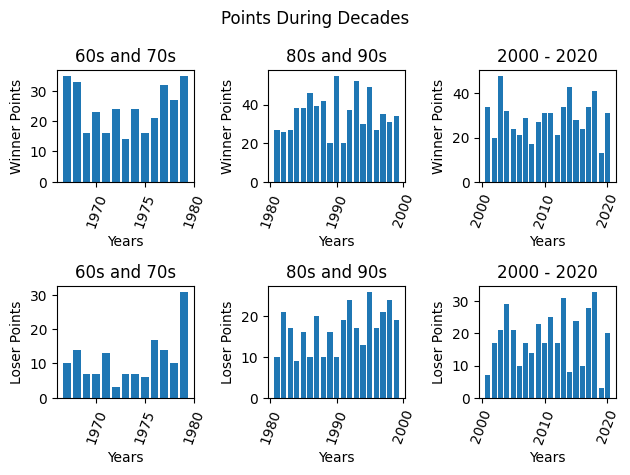

In [45]:
# Winner Points 60's and 70's
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, tight_layout=True)
create_axis(ax1, '60s and 70s', 'Winner Points')
create_axis(ax2, '80s and 90s', 'Winner Points')
create_axis(ax3, '2000 - 2020', 'Winner Points')
create_axis(ax4, '60s and 70s', 'Loser Points')
create_axis(ax5, '80s and 90s', 'Loser Points')
create_axis(ax6, '2000 - 2020', 'Loser Points')

fig.suptitle('Points During Decades')
ax1.bar(beginners['Year'], beginners['Winner Pts'])
ax2.bar(boomers['Year'], boomers['Winner Pts'])
ax3.bar(millenium['Year'], millenium['Winner Pts'])
ax4.bar(beginners['Year'], beginners['Loser Pts'])
ax5.bar(boomers['Year'], boomers['Loser Pts'])
ax6.bar(millenium['Year'], millenium['Loser Pts'])
plt.plot()

In [32]:
# Winners
df['Winner'].value_counts()

Pittsburgh Steelers     6
New England Patriots    6
Dallas Cowboys          5
San Francisco 49ers     5
New York Giants         4
Green Bay Packers       4
Washington Redskins     3
Denver Broncos          3
Kansas City Chiefs      2
Miami Dolphins          2
Baltimore Ravens        2
Oakland Raiders         2
Baltimore Colts         1
Los Angeles Raiders     1
Chicago Bears           1
Tampa Bay Buccaneers    1
St. Louis Rams          1
Indianapolis Colts      1
New Orleans Saints      1
Seattle Seahawks        1
Philadelphia Eagles     1
New York Jets           1
Name: Winner, dtype: int64

In [33]:
# Teams that went to superbowl and did not win
df['Loser'].value_counts()

New England Patriots    5
Denver Broncos          5
Buffalo Bills           4
Minnesota Vikings       4
Miami Dolphins          3
Dallas Cowboys          3
San Francisco 49ers     2
Philadelphia Eagles     2
Washington Redskins     2
Los Angeles Rams        2
Oakland Raiders         2
Cincinnati Bengals      2
Pittsburgh Steelers     2
Seattle Seahawks        2
Carolina Panthers       2
Atlanta Falcons         2
Baltimore Colts         1
St. Louis Rams          1
San Diego Chargers      1
Green Bay Packers       1
Tennessee Titans        1
New York Giants         1
Chicago Bears           1
Arizona Cardinals       1
Indianapolis Colts      1
Kansas City Chiefs      1
Name: Loser, dtype: int64

In [5]:
# Players with MVP awards
df['MVP'].value_counts()

Tom Brady                    4
Joe Montana+                 3
Bart Starr+                  2
Eli Manning                  2
Terry Bradshaw+              2
Harvey MartinRandy White+    1
Jerry Rice+                  1
Doug Williams                1
Phil Simms                   1
Richard Dent+                1
Marcus Allen+                1
John Riggins+                1
Jim Plunkett                 1
Fred Biletnikoff+            1
Mark Rypien                  1
Lynn Swann+                  1
Franco Harris+               1
Larry Csonka+                1
Jake Scott                   1
Roger Staubach+              1
Chuck Howley                 1
Len Dawson+                  1
Joe Namath+                  1
Ottis Anderson               1
Patrick Mahomes              1
Julian Edelman               1
Hines Ward                   1
Nick Foles                   1
Von Miller                   1
Malcolm Smith                1
Joe Flacco                   1
Aaron Rodgers                1
Drew Bre

In [21]:
# Function that groups team data from columns (Winner and Loser)
def group_teams_from_column(column, content = {}):
    for a in column:
        if a not in content.keys():
            content[a] = 0
        content[a] = content[a] + 1
    return content

In [35]:
# Calculating number of times that teams go to superbowl
teams = {}
group_teams_from_column(df['Winner'], teams)
teams = group_teams_from_column(df['Loser'], teams)
sorted_teams = dict(sorted(teams.items(), key=lambda x:-x[1]))

In [37]:
# Most Winners
sorted_teams

{'New England Patriots': 11,
 'Denver Broncos': 8,
 'Pittsburgh Steelers': 8,
 'Dallas Cowboys': 8,
 'San Francisco 49ers': 7,
 'New York Giants': 5,
 'Green Bay Packers': 5,
 'Washington Redskins': 5,
 'Miami Dolphins': 5,
 'Oakland Raiders': 4,
 'Buffalo Bills': 4,
 'Minnesota Vikings': 4,
 'Kansas City Chiefs': 3,
 'Philadelphia Eagles': 3,
 'Seattle Seahawks': 3,
 'Baltimore Ravens': 2,
 'Indianapolis Colts': 2,
 'St. Louis Rams': 2,
 'Chicago Bears': 2,
 'Baltimore Colts': 2,
 'Los Angeles Rams': 2,
 'Atlanta Falcons': 2,
 'Carolina Panthers': 2,
 'Cincinnati Bengals': 2,
 'New Orleans Saints': 1,
 'Tampa Bay Buccaneers': 1,
 'Los Angeles Raiders': 1,
 'New York Jets': 1,
 'Arizona Cardinals': 1,
 'Tennessee Titans': 1,
 'San Diego Chargers': 1}